<a href="https://colab.research.google.com/github/Stacy067/Data-Analysis-for-Python/blob/main/2_2_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_%E1%84%80%E1%85%AA%E1%86%AB%E1%84%89%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%B5%E1%86%BB%E1%84%82%E1%85%B3%E1%86%AB_%E1%84%8C%E1%85%A9%E1%86%BC%E1%84%86%E1%85%A9%E1%86%A8%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%89%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%A8%E1%84%85%E1%85%B2%E1%86%AF_%E1%84%80%E1%85%AE%E1%84%92%E1%85%A2%E1%84%87%E1%85%A9%E1%84%80%E1%85%B5_%EA%B9%80%EC%84%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 관심있는 종목의 일별 시세를 수집해서 수업에서 했던 내용을 응용해 보세요.
* 아래의 종목은 예시로 원하는 종목으로 변경해서 분석해도 됩니다.


* <font color="blue">주피터 노트북 파일명에 본인의 이름을 적어주세요.</font>

* GAFAM, FAAMG, Tech Giants 또는 Big Five라고도 알려진 Big Tech는 미국 정보 기술 산업에서 가장 크고 가장 지배적인 5개 회사(Google, Apple, Facebook, Amazon 및 Microsoft)에 주어진 이름 입니다.
* 아래는 미국의 대표적인 기술주인 FAANG주의 ticker 를 모아두었습니다. 관심있는 종목코드 혹은 ticker를 찾아서 분석해 보세요!

In [ ]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True

In [ ]:
# 미국 주요 기술주
# 아래 종목은 어떤 종목을 분석해야 할지 떠오르지 않을 때 사용할 수 있게 예시로 적어두었습니다.
# 관심있는 다른 종목을 분석해도 좋습니다.
faang = {"META":"Meta", "AMZN":"Amazon", "AAPL":"Apple", "NFLX":"Netflix", "GOOGL":"Google"}
faang

{'AAPL': 'Apple',
 'AMZN': 'Amazon',
 'GOOGL': 'Google',
 'META': 'Meta',
 'NFLX': 'Netflix'}

In [ ]:
print(faang.keys())

dict_keys(['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL'])


In [ ]:
# faang 변수에 담긴 key 값만 가져옵니다. 
faang.keys()

dict_keys(['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL'])

In [ ]:
# faang 변수에 담긴 values 값만 가져옵니다. 
faang.values()

dict_values(['Meta', 'Amazon', 'Apple', 'Netflix', 'Google'])

In [ ]:
import pandas as pd
df_faang= pd.DataFrame(list(faang.items()), columns = ["Symbol", "Name"]) 
df_faang

,Symbol,Name
0,META,Meta
1,AMZN,Amazon
2,AAPL,Apple
3,NFLX,Netflix
4,GOOGL,Google


In [ ]:
df_faang["Symbol"]

0     META
1     AMZN
2     AAPL
3     NFLX
4    GOOGL
Name: Symbol, dtype: object

In [ ]:
df_faang = df_faang[["Symbol"]]
df_faang

,Symbol
0,META
1,AMZN
2,AAPL
3,NFLX
4,GOOGL


In [ ]:
# S&P500 종목 리스트
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head()

/usr/local/lib/python3.7/dist-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


In [ ]:
df_sp500 = sp500[["Symbol", "Name"]]
df_sp500.head()

,Symbol,Name
0,MMM,3M
1,AOS,A. O. Smith
2,ABT,Abbott
3,ABBV,AbbVie
4,ABMD,Abiomed


In [ ]:
df_faang5 = df_faang.merge(df_sp500, left_on="Symbol", right_on="Symbol")
df_faang5 = df_faang5[["Symbol", "Name"]]
df_faang5

,Symbol,Name
0,META,Meta Platforms
1,AMZN,Amazon
2,AAPL,Apple Inc.
3,NFLX,Netflix
4,GOOGL,Alphabet Inc. (Class A)


In [ ]:
# 가격 데이터 가져오기 예시
import FinanceDataReader as fdr

aapl = fdr.DataReader('AAPL', '2010-01-01', '2019-12-31')
aapl.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-04,7.64,7.62,7.66,7.58,493730000.0,0.0146
2010-01-05,7.66,7.66,7.70,7.62,601900000.0,0.0026
2010-01-06,7.53,7.66,7.69,7.53,552160000.0,-0.0170
2010-01-07,7.52,7.56,7.57,7.47,477130000.0,-0.0013
2010-01-08,7.57,7.51,7.57,7.47,447880000.0,0.0066
2010-01-11,7.50,7.60,7.61,7.44,462230000.0,-0.0092
2010-01-12,7.42,7.47,7.49,7.37,594460000.0,-0.0107
2010-01-13,7.52,7.42,7.53,7.29,605890000.0,0.0135
2010-01-14,7.48,7.50,7.52,7.46,433150000.0,-0.0053


In [ ]:
df_faang5.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
df_faang5

,Symbol,Name
0,META,Meta Platforms
1,AMZN,Amazon
2,AAPL,Apple Inc.
3,NFLX,Netflix
4,GOOGL,Alphabet Inc. (Class A)


In [ ]:
# index 값을 순회해서 가져오기
item_list = []
for idx in df_faang5.index:
    symbol = df_faang5.loc[idx, "Symbol"]
    # 종목마다 순회하며 일별 시세의 종가를 수집합니다.
    close_price = fdr.DataReader(symbol, '2022')['Close']
    item_list.append(close_price)

In [ ]:
item_list

[Date
 2022-01-03    338.54
 2022-01-04    336.53
 2022-01-05    324.17
 2022-01-06    332.46
 2022-01-07    331.79
                ...  
 2022-07-11    162.88
 2022-07-12    163.27
 2022-07-13    163.49
 2022-07-14    158.05
 2022-07-15    164.70
 Name: Close, Length: 134, dtype: float64, Date
 2022-01-03    170.40
 2022-01-04    167.52
 2022-01-05    164.36
 2022-01-06    163.25
 2022-01-07    162.55
                ...  
 2022-07-11    111.75
 2022-07-12    109.22
 2022-07-13    110.40
 2022-07-14    110.63
 2022-07-15    113.55
 Name: Close, Length: 134, dtype: float64, Date
 2022-01-03    182.01
 2022-01-04    179.70
 2022-01-05    174.92
 2022-01-06    172.00
 2022-01-07    172.17
                ...  
 2022-07-11    144.87
 2022-07-12    145.86
 2022-07-13    145.49
 2022-07-14    148.47
 2022-07-15    150.17
 Name: Close, Length: 134, dtype: float64, Date
 2022-01-03    597.37
 2022-01-04    591.15
 2022-01-05    567.52
 2022-01-06    553.29
 2022-01-07    541.06
              

In [ ]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
df = pd.concat(item_list, axis=1)
cols = df_faang5["Name"].tolist()
cols
df.columns = cols
df.head()

,Meta Platforms,Amazon,Apple Inc.,Netflix,Alphabet Inc. (Class A)
Date,,,,,
2022-01-03,338.54,170.40,182.01,597.37,144.99
2022-01-04,336.53,167.52,179.70,591.15,144.40
2022-01-05,324.17,164.36,174.92,567.52,137.78
2022-01-06,332.46,163.25,172.00,553.29,137.75
2022-01-07,331.79,162.55,172.17,541.06,137.02


In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 13.3 MB/s 


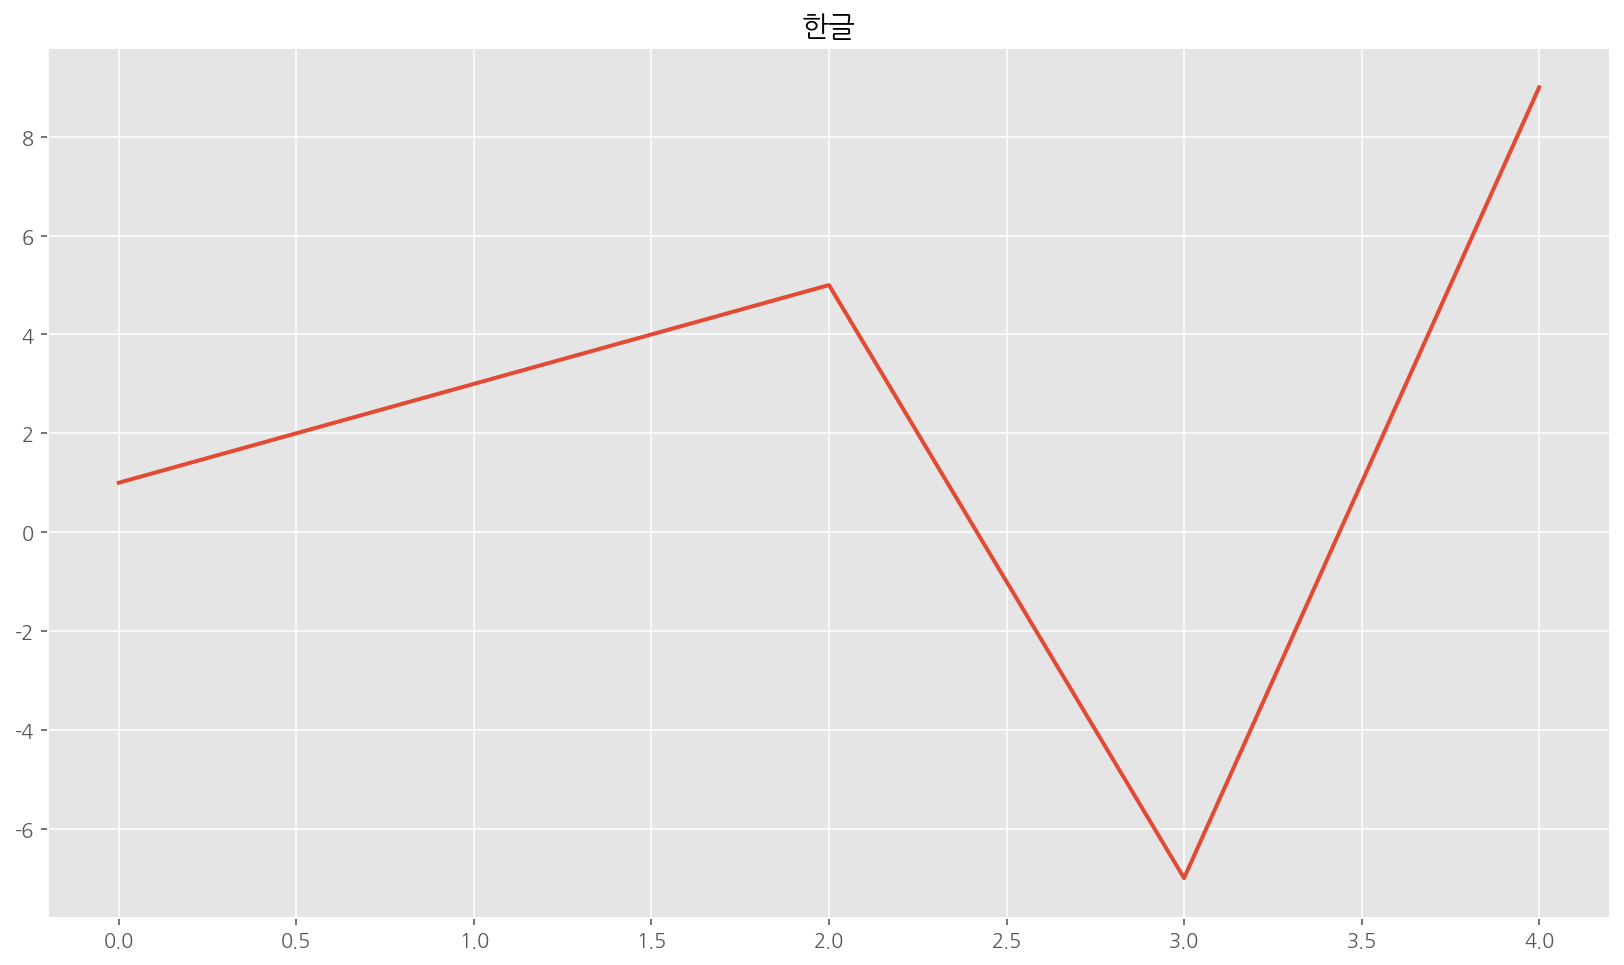

In [ ]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

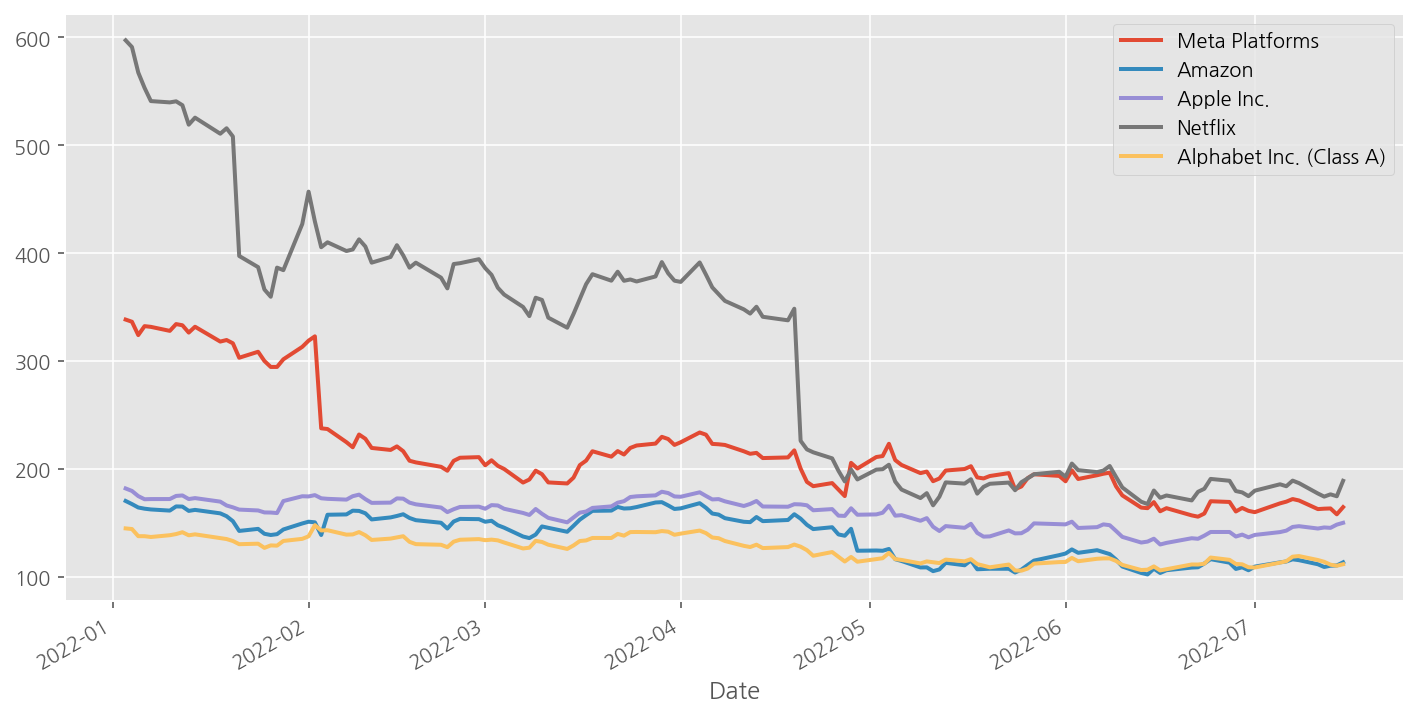

In [ ]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1))

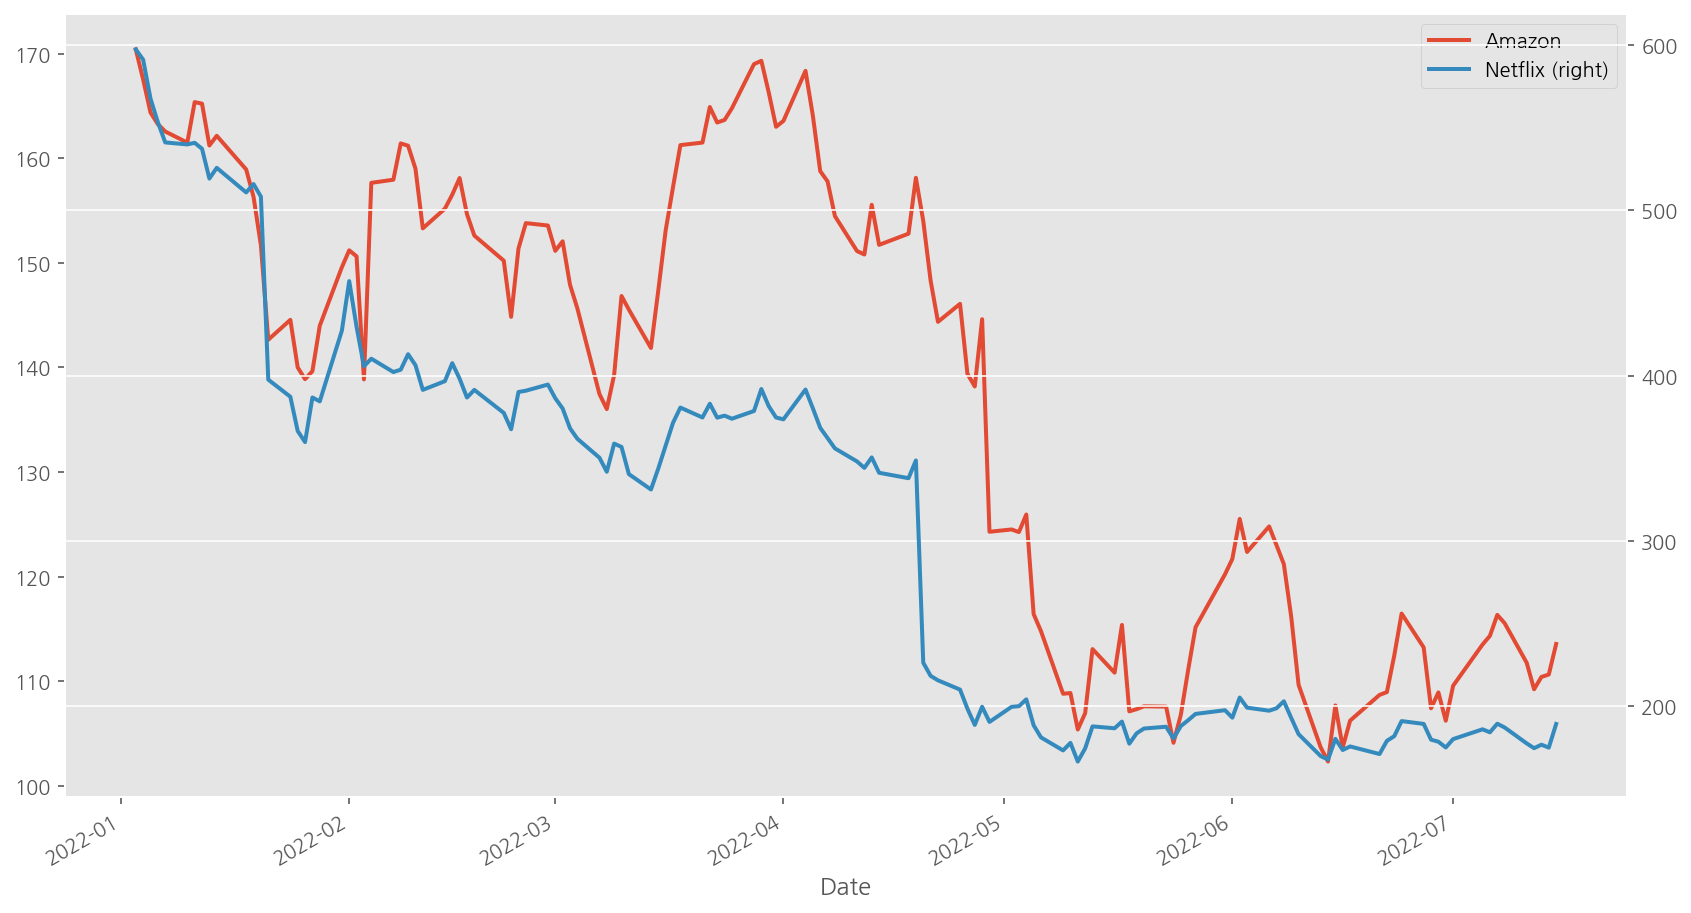

In [ ]:
# secondary_y를 사용해 2축 그래프 그리기
df[["Amazon", "Netflix"]].plot(secondary_y="Netflix")

In [ ]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[["Amazon", "Netflix"]]
df_plot = df2 / df2.iloc[0] -1

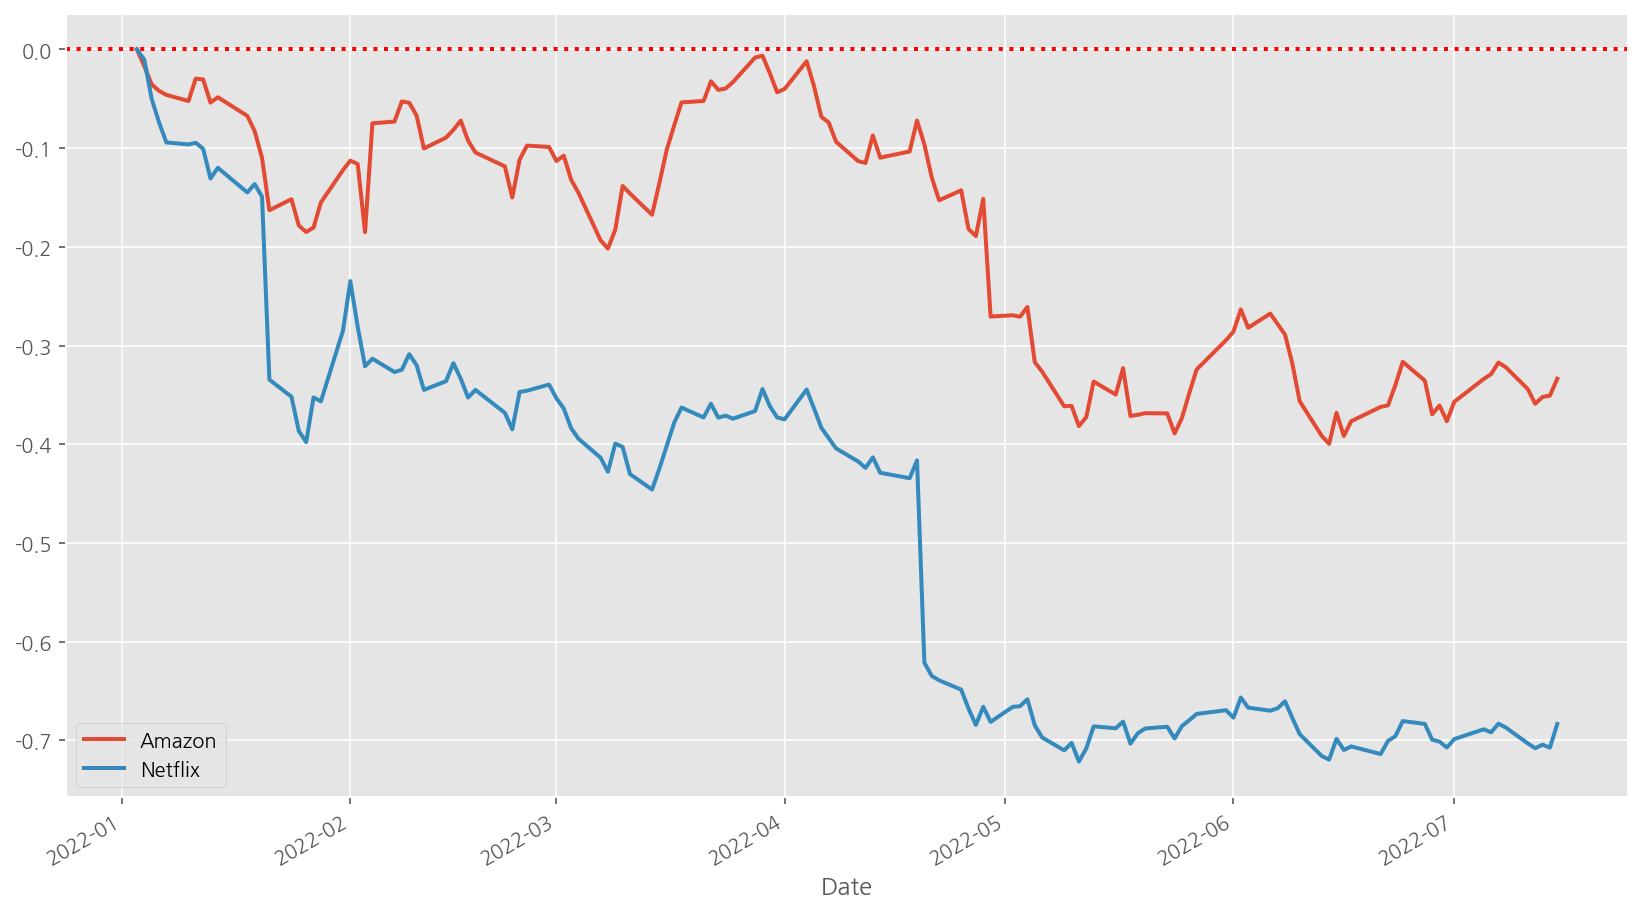

In [ ]:
# 수익률 시각화 하기
df_plot.plot()
plt.axhline(0,c="r", linestyle=":")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aed027e10>,
      dtype=object)

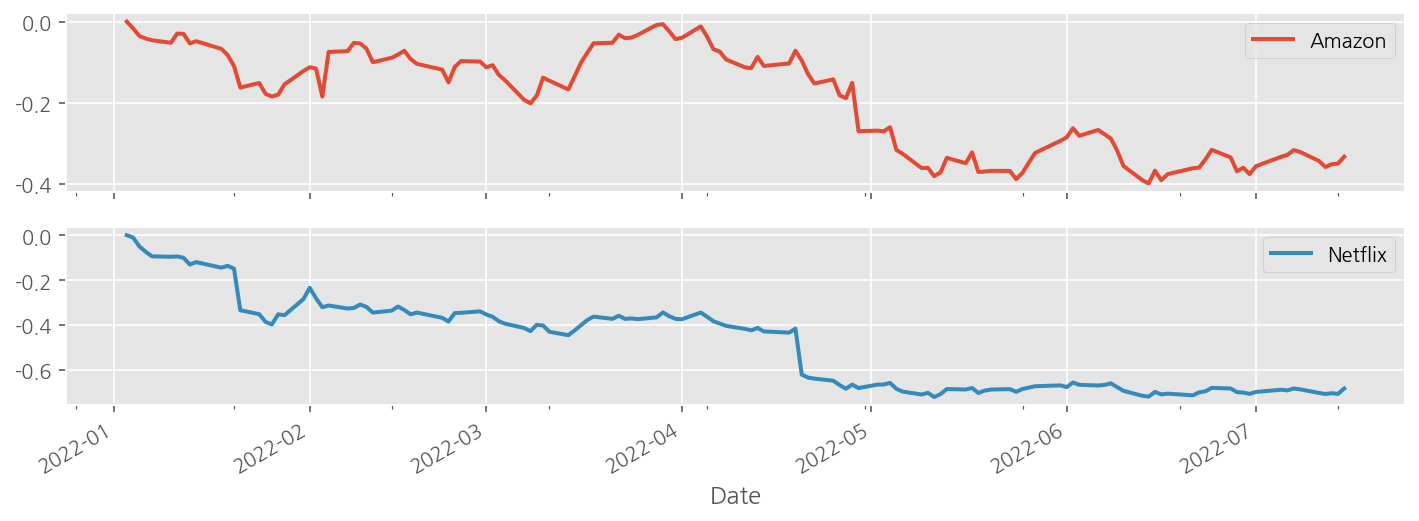

In [ ]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.

df_plot.plot(subplots=True, figsize=(12,4))

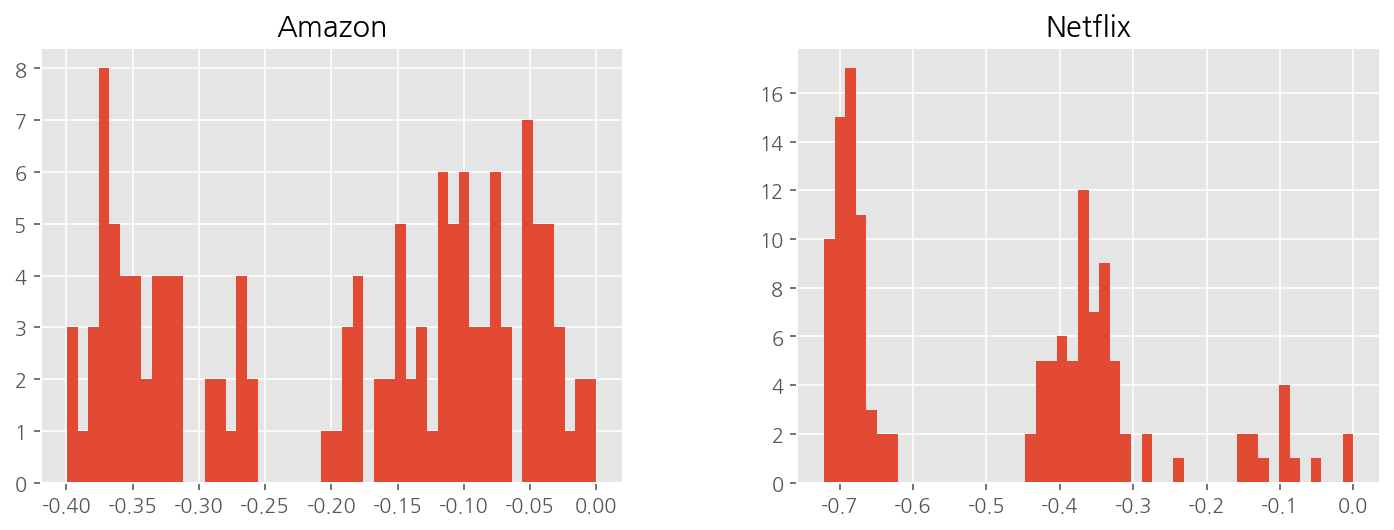

In [ ]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
_ = df_plot.hist(bins=50, figsize=(12,4)) #일별 시세 막대 개수를 그려줌 #도수분포표

In [ ]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = (df / df.iloc[0]) -1
df_norm

,Meta Platforms,Amazon,Apple Inc.,Netflix,Alphabet Inc. (Class A)
Date,,,,,
2022-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,-0.005937,-0.016901,-0.012692,-0.010412,-0.004069
2022-01-05,-0.042447,-0.035446,-0.038954,-0.049969,-0.049728
2022-01-06,-0.017959,-0.041960,-0.054997,-0.073790,-0.049934
2022-01-07,-0.019939,-0.046068,-0.054063,-0.094263,-0.054969
...,...,...,...,...,...
2022-07-11,-0.518875,-0.344190,-0.204055,-0.703132,-0.202152
2022-07-12,-0.517723,-0.359038,-0.198615,-0.707970,-0.213601
2022-07-13,-0.517073,-0.352113,-0.200648,-0.704438,-0.232016


In [ ]:
#첫 거래일 기준으로 수익률을 계산
df_norm["Netflix"] = df["Netflix"] / df["Netflix"].dropna().iloc[0]-1

In [ ]:
df_norm

,Meta Platforms,Amazon,Apple Inc.,Netflix,Alphabet Inc. (Class A)
Date,,,,,
2022-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,-0.005937,-0.016901,-0.012692,-0.010412,-0.004069
2022-01-05,-0.042447,-0.035446,-0.038954,-0.049969,-0.049728
2022-01-06,-0.017959,-0.041960,-0.054997,-0.073790,-0.049934
2022-01-07,-0.019939,-0.046068,-0.054063,-0.094263,-0.054969
...,...,...,...,...,...
2022-07-11,-0.518875,-0.344190,-0.204055,-0.703132,-0.202152
2022-07-12,-0.517723,-0.359038,-0.198615,-0.707970,-0.213601
2022-07-13,-0.517073,-0.352113,-0.200648,-0.704438,-0.232016


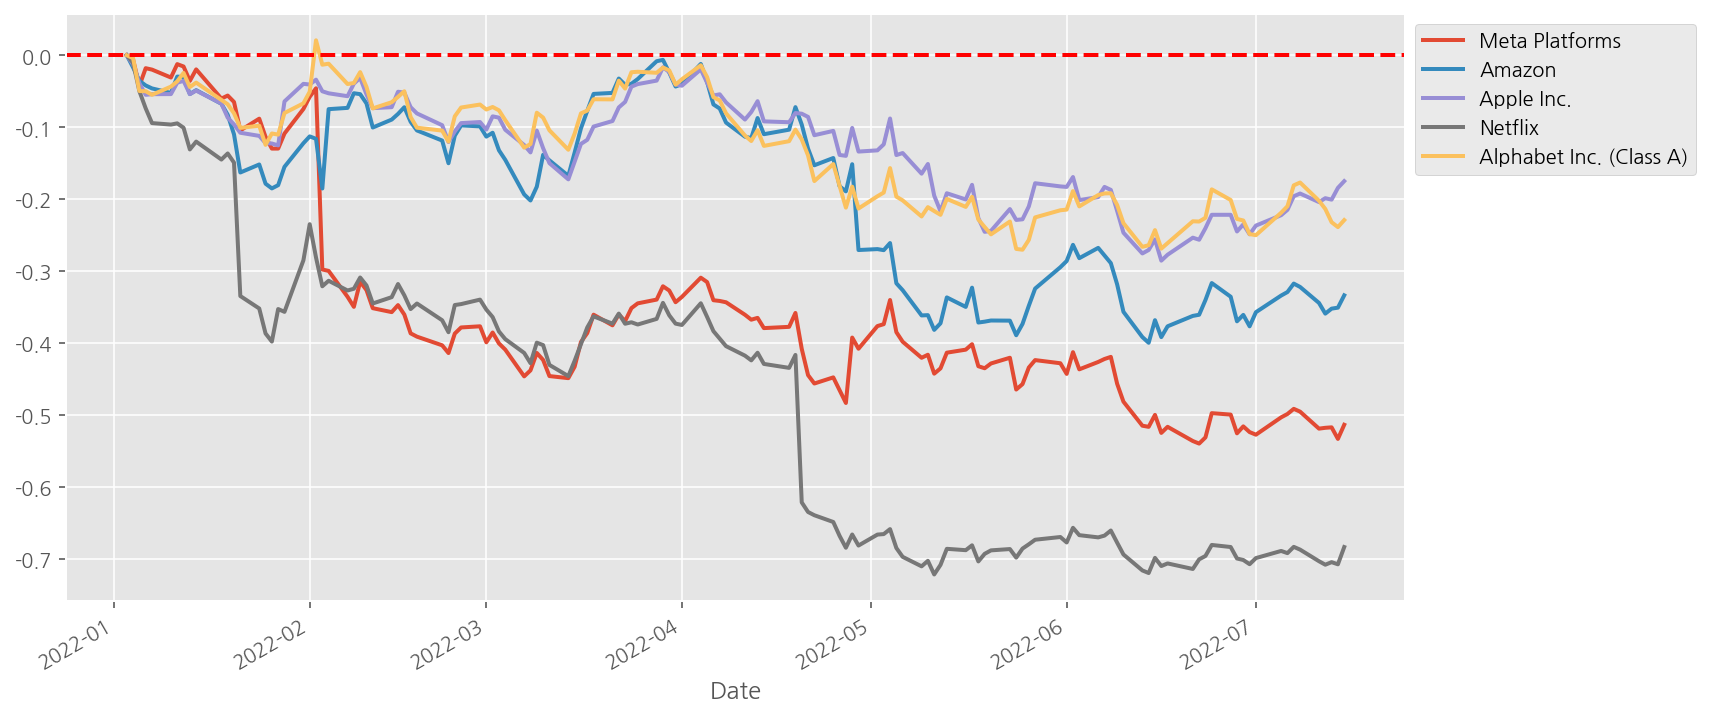

In [ ]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(12,6))
plt.axhline(0,c="r", linestyle="--")
plt.legend(bbox_to_anchor=(1,1))

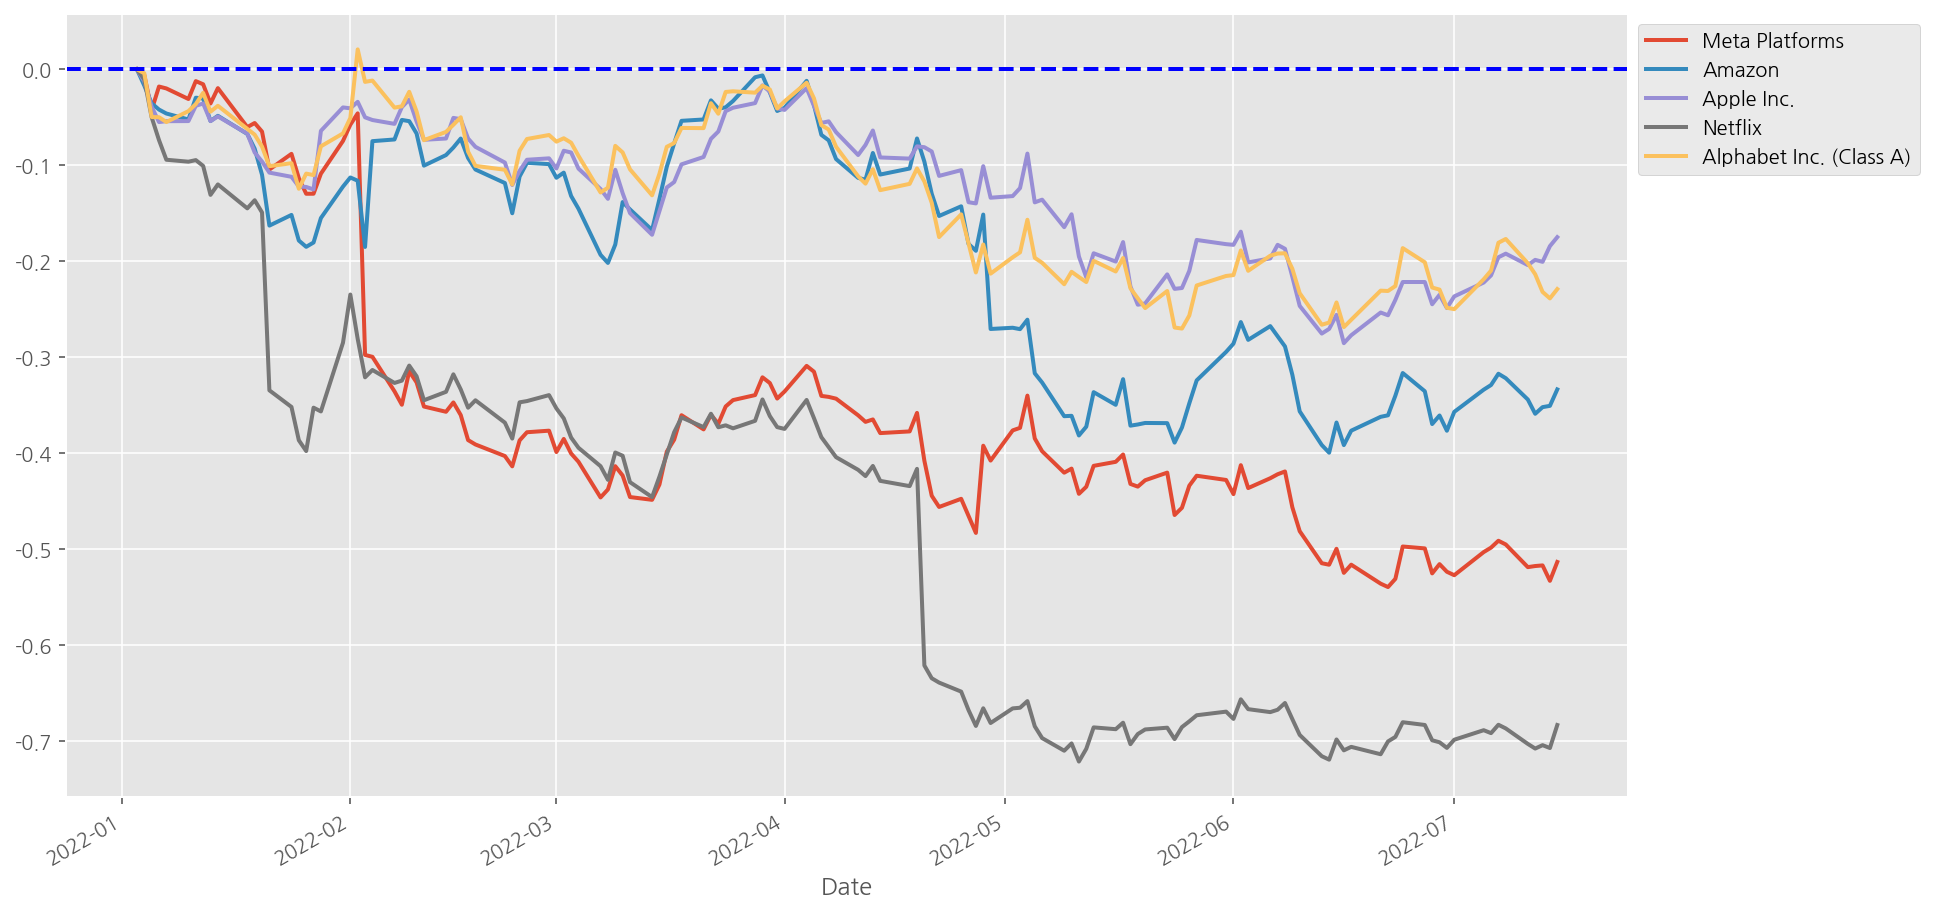

In [ ]:
df_norm.iloc[:,:5].plot()
plt.axhline(0,c="b", linestyle="--")
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

,Meta Platforms,Amazon,Apple Inc.,Netflix,Alphabet Inc. (Class A)
count,134.000000,134.000000,134.000000,134.000000,134.000000
mean,-0.358315,-0.191411,-0.128019,-0.483108,-0.132279
std,0.147584,0.127838,0.074106,0.202014,0.081448
min,-0.539641,-0.399589,-0.285424,-0.721496,-0.270226
25%,-0.445487,-0.328404,-0.194357,-0.684659,-0.210963
50%,-0.398299,-0.151585,-0.111560,-0.420711,-0.118043
75%,-0.340159,-0.078301,-0.064337,-0.352098,-0.061487
max,0.000000,0.000000,0.000000,0.000000,0.020760


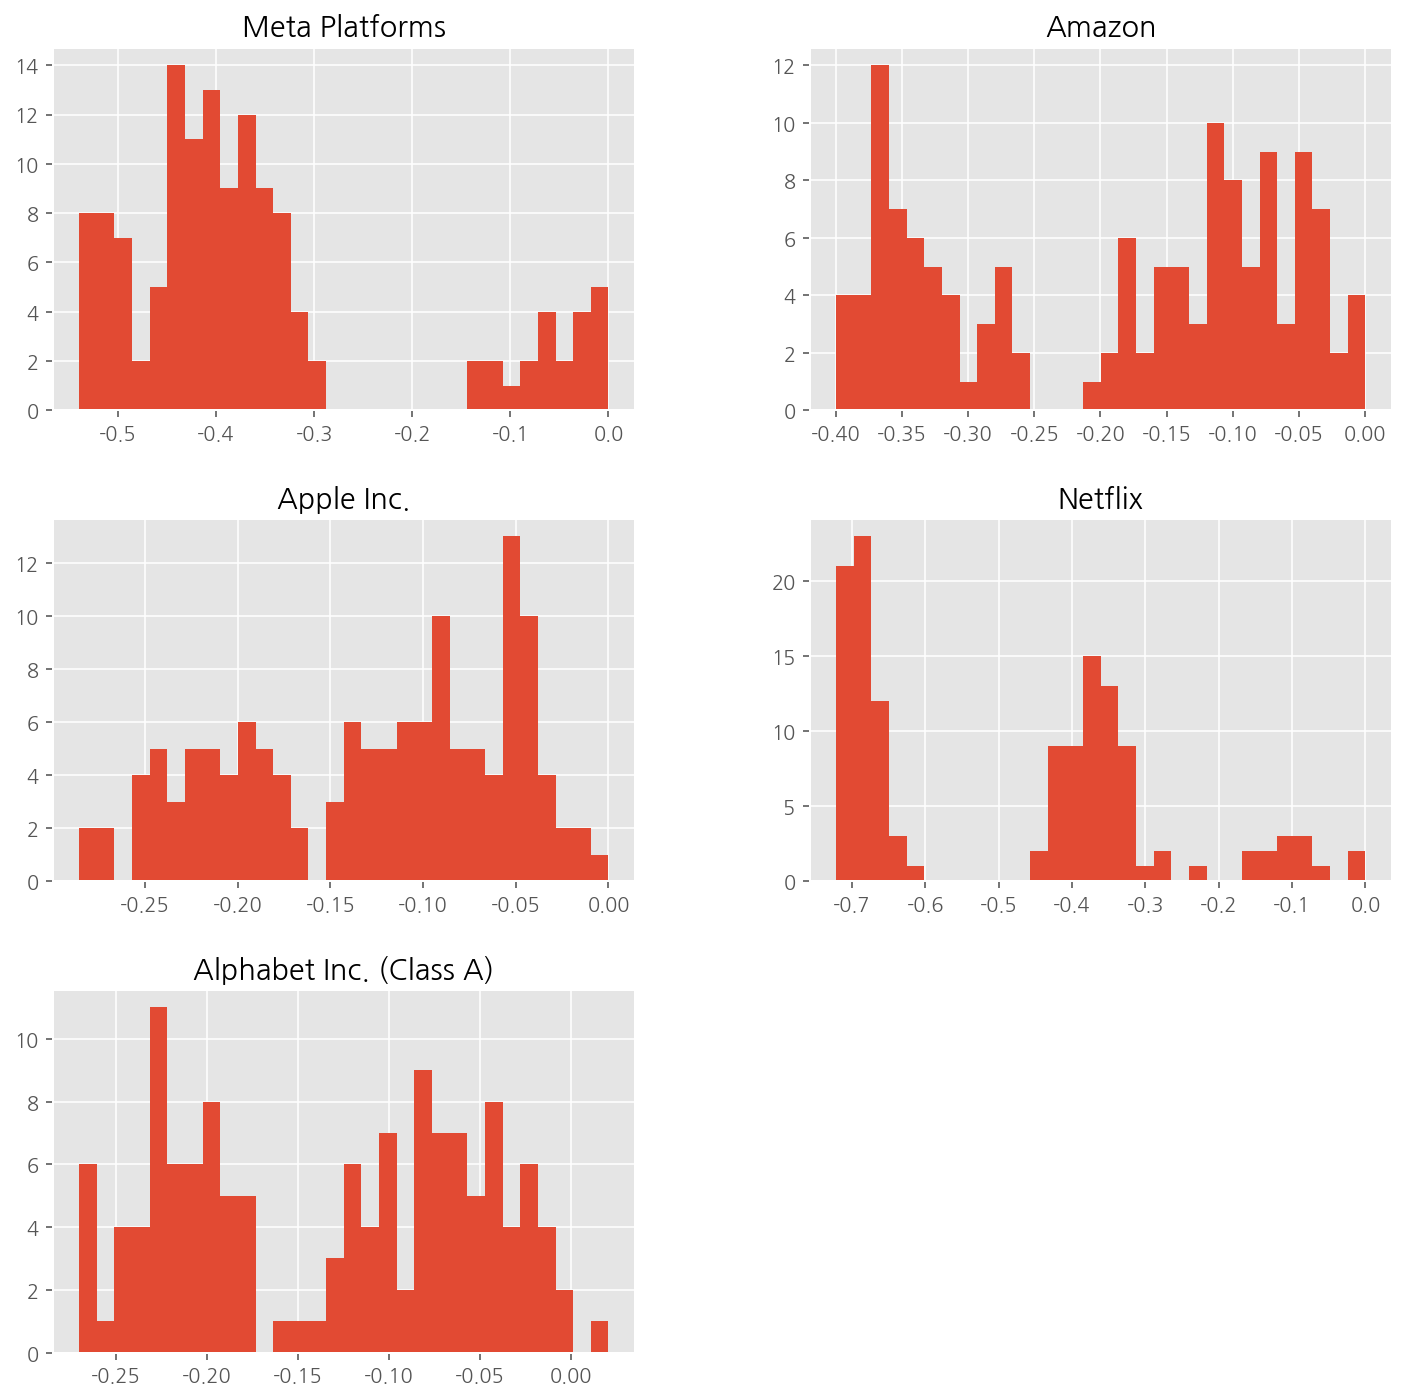

In [ ]:
# 수익률에 대한 히스토그램 그리기
_ = df_norm.hist(bins=30, figsize=(12,12)) #일별 시세 막대 개수를 그려줌 #도수분포표